In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Machine Learning/healthcare_diabetes_prediction-main/healthcare_diabetes_prediction-main/Diabetes.csv')
df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [7]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

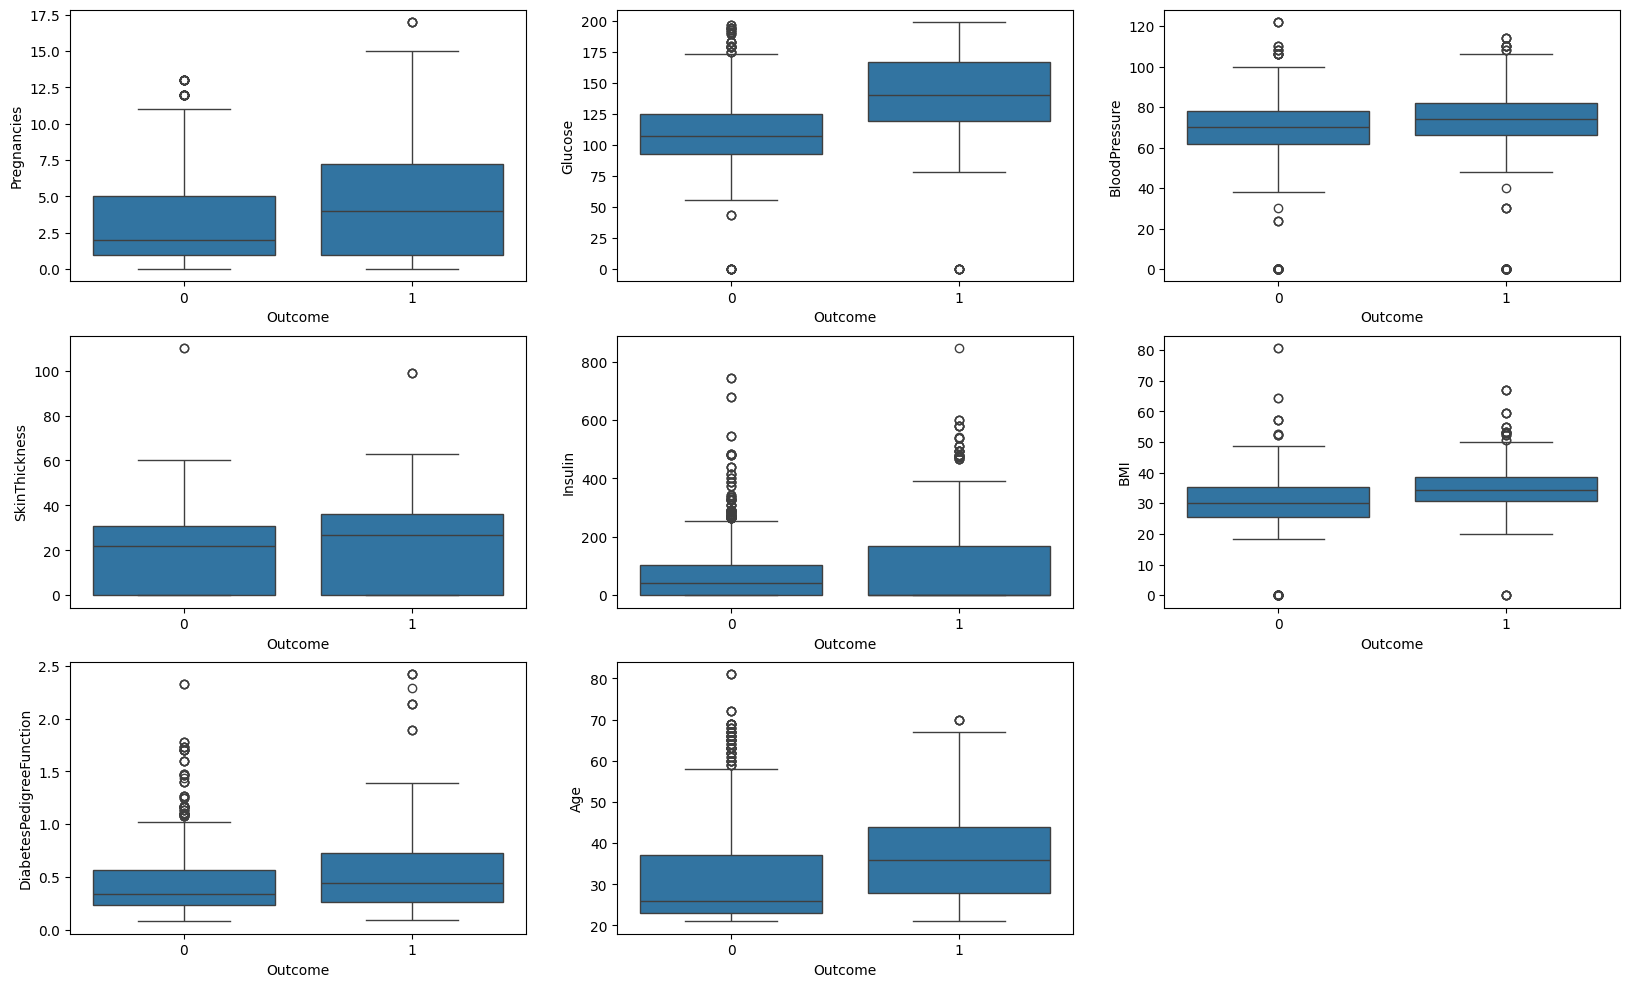

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'Outcome', y = 'BMI', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.show()

In [21]:
X = df.drop(['Id','Outcome'],axis=1)
y = df['Outcome']

In [23]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2765            6       85             78              0        0  31.2   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.627   50  
1                      

In [25]:
print(y)

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [59]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()
# Fit scaler to training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier()
]

# Create a dictionary to store the results
results = {}

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

RandomForestClassifier Accuracy: 0.9963898916967509
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       364
           1       1.00      0.99      0.99       190

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554

Confusion Matrix for RandomForestClassifier:
[[364   0]
 [  2 188]]
AdaBoostClassifier Accuracy: 0.7978339350180506
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       364
           1       0.73      0.65      0.69       190

    accuracy                           0.80       554
   macro avg       0.78      0.76      0.77       554
weighted avg       0.79      0.80      0.79       554

Confusion Matrix for AdaBoostClassifier:
[[318  46]
 [ 66 124]]
GradientBoostingCl

In [63]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Append results to DataFrame
    results_df = pd.concat([results_df,pd.DataFrame([{'Model': clf_name, 'Accuracy': accuracy, 'F1-Score': f1_score, 
                                    'Precision': precision, 'Recall': recall}])], ignore_index=True)

results_df

,Model,Accuracy,F1-Score,Precision,Recall
0,RandomForestClassifier,0.996390,0.996385,0.996410,0.996390
1,AdaBoostClassifier,0.797834,0.794921,0.794270,0.797834
2,GradientBoostingClassifier,0.871841,0.868766,0.872027,0.871841
3,LogisticRegression,0.772563,0.765107,0.766699,0.772563
4,SVC,0.826715,0.821386,0.825060,0.826715
5,KNeighborsClassifier,0.851986,0.850551,0.850313,0.851986
6,DecisionTreeClassifier,0.989170,0.989183,0.989225,0.989170
7,GaussianNB,0.738267,0.735531,0.733926,0.738267
8,XGBClassifier,0.996390,0.996390,0.996390,0.996390


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9963898916967509
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       364
           1       1.00      0.99      0.99       190

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554

Confusion Matrix for Random Forest Classifier:
[[364   0]
 [  2 188]]


In [67]:
# test 1:
print("predcted class ",rf_classifier.predict(X_test_scaled[10].reshape(1,-1))[0])
print("actual class ", y_test.iloc[10])

predcted class  1
actual class  1


In [69]:
# test 2:
print("predcted class ",rf_classifier.predict(X_test_scaled[200].reshape(1,-1))[0])
print("actual class ", y_test.iloc[200])

predcted class  0
actual class  0


In [71]:
# test 3:
print("predcted class ",rf_classifier.predict(X_test_scaled[110].reshape(1,-1))[0])
print("actual class ", y_test.iloc[110])

predcted class  0
actual class  0


In [77]:
import numpy as np

def predict(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
    
    
    # Prepare features array
    features = np.array([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
    
    # scalling
    scaled_features = scaler.transform(features)
    
    # predict by model
    result = rf_classifier.predict(scaled_features)
    
    return result[0]

In [85]:
# test 1
Pregnancies = 3            
Glucose =  78                  
BloodPressure =  50           
SkinThickness = 32             
Insulin = 88                   
BMI = 31.0                       
DiabetesPedigreeFunction = 0.248
Age = 26

result = predict(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age)

if result == 1:
    print("The Patient is diabetic")
else: 
    print("The Patient is not diabetic")

The Patient is diabetic


In [ ]:
# test 1
# 3	78	50	32	88	31.0	0.248	26	1

In [87]:
# test 2
Pregnancies = 1            
Glucose =  89                  
BloodPressure =  66          
SkinThickness = 23             
Insulin = 94                  
BMI = 28.1                       
DiabetesPedigreeFunction = 0.167
Age = 21

result = predict(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age)

if result == 1:
    print("The Patient is diabetic")
else: 
    print("The Patient is not diabetic")

The Patient is not diabetic


In [ ]:
# test 2
# 1	89	66	23	94	28.1	0.167	21	0

In [89]:
import pickle
pickle.dump(rf_classifier,open("rf_classifier.pkl",'wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))